# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools1 import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets

my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price

response_btc = requests.get(btc_url).json()
response_btc

{'data': {'1': {'id': 1,
   'name': 'Bitcoin',
   'symbol': 'BTC',
   'website_slug': 'bitcoin',
   'rank': 1,
   'circulating_supply': 19588050,
   'total_supply': 19588050,
   'max_supply': 21000000,
   'quotes': {'USD': {'price': 45268.0,
     'volume_24h': 32485712434,
     'market_cap': 886831443302,
     'percentage_change_1h': 0.0239588498199475,
     'percentage_change_24h': -0.0390432350862152,
     'percentage_change_7d': 6.67040846074001,
     'percent_change_1h': 0.0239588498199475,
     'percent_change_24h': -0.0390432350862152,
     'percent_change_7d': 6.67040846074001},
    'CAD': {'price': 61496.578,
     'volume_24h': 44131840341.589,
     'market_cap': 1204760515725.77,
     'percent_change_1h': 0.0239588498199475,
     'percent_change_24h': -0.0390432350862152,
     'percent_change_7d': 6.67040846074001}},
   'last_updated': 1704249679}},
 'metadata': {'timestamp': 1704249679,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [6]:
# btc_price = response_btc.get('price')
# btc_price # don't think this is right.. can I just assign the number the variable or do I need code here?

current_btc_price = 57575.947

In [7]:
# Fetch current ETH price

response_eth = requests.get(eth_url).json()
response_eth

{'data': {'1027': {'id': 1027,
   'name': 'Ethereum',
   'symbol': 'ETH',
   'website_slug': 'ethereum',
   'rank': 2,
   'circulating_supply': 120185496,
   'total_supply': 120185496,
   'max_supply': 120183067,
   'quotes': {'USD': {'price': 2372.03,
     'volume_24h': 14899848095,
     'market_cap': 285151734846,
     'percentage_change_1h': 0.0314780383099657,
     'percentage_change_24h': -0.577274909805844,
     'percentage_change_7d': 6.35469224419984,
     'percent_change_1h': 0.0314780383099657,
     'percent_change_24h': -0.577274909805844,
     'percent_change_7d': 6.35469224419984},
    'CAD': {'price': 3222.402755,
     'volume_24h': 20241443637.0575,
     'market_cap': 387378631788.291,
     'percent_change_1h': 0.0314780383099657,
     'percent_change_24h': -0.577274909805844,
     'percent_change_7d': 6.35469224419984}},
   'last_updated': 1704249691}},
 'metadata': {'timestamp': 1704249691,
  'num_cryptocurrencies': 3119,
  'error': None}}

In [8]:
 current_eth_price = 3130.106265

In [9]:
# Compute current value of my crypto

my_btc_value = my_btc * current_btc_price
my_btc_value

69091.1364

In [10]:
my_eth_value = my_eth * current_eth_price
my_eth_value

16589.5632045

In [11]:
total_crypto_wallet = my_btc_value + my_eth_value
total_crypto_wallet

85680.6996045

In [12]:
# Print current crypto wallet balance

print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $69091.14
The current value of your 5.3 ETH is $16589.56


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [13]:
# Set current amount of shares

my_agg = 200
my_spy = 50

In [14]:
# Set Alpaca API key and secret
api_key = os.getenv('ALPACA_API_KEY')
secret_key = os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
# written in the alpaca API documentation

alpaca = tradeapi.REST(api_key, secret_key, api_version='v2') # do I use v2 or v2?

In [15]:
# Format current date as ISO format
today = pd.Timestamp('2023-12-29-',tz='America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

In [16]:
# Get current closing prices for SPY and AGG

df_portfolio = alpaca.get_bars(tickers, timeframe, start = today, end = today).df
df_portfolio

close     high     low  trade_count    open  \
timestamp                                                                 
2023-12-29 05:00:00+00:00   99.25   99.425   99.13        26060   99.20   
2023-12-29 05:00:00+00:00  475.31  477.030  473.30       604247  476.49   

                              volume        vwap symbol  
timestamp                                                
2023-12-29 05:00:00+00:00    7327722   99.285422    AGG  
2023-12-29 05:00:00+00:00  122268009  475.364010    SPY

In [17]:
# Reorganize the DataFrame
# Separate ticker data

AGG = df_portfolio[df_portfolio['symbol'] == 'AGG']
AGG = AGG.drop('symbol',axis=1)

SPY = df_portfolio[df_portfolio['symbol'] == 'SPY'].drop('symbol',axis=1)

In [18]:
AGG

close    high    low  trade_count  open   volume  \
timestamp                                                                     
2023-12-29 05:00:00+00:00  99.25  99.425  99.13        26060  99.2  7327722   

                                vwap  
timestamp                             
2023-12-29 05:00:00+00:00  99.285422

In [19]:
SPY

close    high    low  trade_count    open  \
timestamp                                                               
2023-12-29 05:00:00+00:00  475.31  477.03  473.3       604247  476.49   

                              volume       vwap  
timestamp                                        
2023-12-29 05:00:00+00:00  122268009  475.36401

In [20]:
# Concatenate the ticker DataFrames

df_portfolio = pd.concat([AGG,SPY], axis = 1, keys = ['AGG','SPY'])

# Preview DataFrame

df_portfolio

AGG                                            \
                           close    high    low trade_count  open   volume   
timestamp                                                                    
2023-12-29 05:00:00+00:00  99.25  99.425  99.13       26060  99.2  7327722   

                                         SPY                             \
                                vwap   close    high    low trade_count   
timestamp                                                                 
2023-12-29 05:00:00+00:00  99.285422  475.31  477.03  473.3      604247   

                                                         
                             open     volume       vwap  
timestamp                                                
2023-12-29 05:00:00+00:00  476.49  122268009  475.36401

In [21]:
# Pick AGG and SPY close prices

AGG_close_price = df_portfolio['AGG']['close'].iloc[0]
SPY_close_price = df_portfolio['SPY']['close'].iloc[0]

# Print AGG and SPY close prices

print(f"Current AGG closing price: ${AGG_close_price}")
print(f"Current SPY closing price: ${SPY_close_price}")

Current AGG closing price: $99.25
Current SPY closing price: $475.31


In [22]:
# Compute the current value of shares

AGG_value = AGG_close_price * my_agg
SPY_value = SPY_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${SPY_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${AGG_value:0.2f}")

The current value of your 50 SPY shares is $23765.50
The current value of your 200 AGG shares is $19850.00


In [23]:
total_shares = AGG_value + SPY_value
total_shares

43615.5

### Savings Health Analysis

In [24]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE! ? what to put here

# Create savings DataFrame
df_savings = pd.DataFrame({"amount": [total_crypto_wallet, total_shares]}, index = ["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

# are my numbers correct? Not the same as BCS picture given

amount
crypto  85680.699604
shares  43615.500000

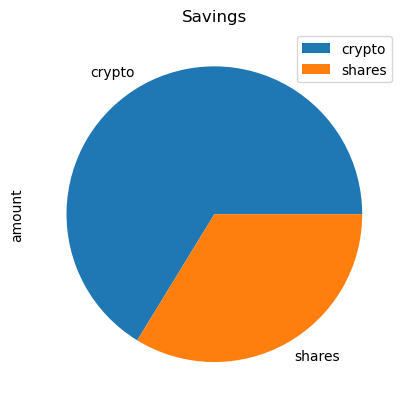

In [25]:
# Plot savings pie chart

df_savings.plot.pie(y='amount',title='Savings');

In [26]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = total_crypto_wallet + total_shares

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money for an emergency fund.")
if total_savings == emergency_fund:
    print("Congratulations! You've reached your emergency fund goal.")
if total_savings < emergency_fund:
    print(f"You are ${emergency_fund - total_savings} short from reaching your goal.")

Congratulations! You have enough money for an emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [39]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-12-30', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-12-30', tz='America/New_York').isoformat()

In [40]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(tickers,timeframe, start = start_date, end = end_date).df

# Reorganize the DataFrame
# Separate ticker data

AGG = df_stock_data[df_stock_data['symbol'] == 'AGG']
AGG = AGG.drop('symbol',axis=1)

SPY = df_stock_data[df_stock_data['symbol'] == 'SPY'].drop('symbol',axis=1)

# Concatenate the ticker DataFrames
df_stock_data = pd.concat([AGG, SPY], axis=1, keys=["AGG", "SPY"])

# Display sample data
df_stock_data.head()


AGG                                         \
                            close     high       low trade_count    open   
timestamp                                                                  
2018-12-31 05:00:00+00:00  106.49  106.510  106.1100       27920  106.12   
2019-01-02 05:00:00+00:00  106.57  106.610  106.4701       27947  106.55   
2019-01-03 05:00:00+00:00  107.01  107.075  106.5700       20214  106.57   
2019-01-04 05:00:00+00:00  106.69  106.720  106.5500       19548  106.66   
2019-01-07 05:00:00+00:00  106.51  106.790  106.4600       23936  106.72   

                                                    SPY                  \
                             volume        vwap   close    high     low   
timestamp                                                                 
2018-12-31 05:00:00+00:00  10613435  106.394350  250.08  250.19  247.47   
2019-01-02 05:00:00+00:00  11665497  106.543515  250.23  251.21  245.95   
2019-01-03 05:00:00+00:00   6661940  106.935661  244.15  248.57  243.67   
2019-01-04 05:00:00+00:00   8392420  106.640950  252.39  253.11  247.17   
2019-01-07 05:00:00+00:00   7636381  106.586821  254.29  255.95  251.69   

                                                                      
                          trade_count    open     volume        vwap  
timestamp                                                             
2018-12-31 05:00:00+00:00      591024  249.56  147557713  249.158331  
2019-01-02 05:00:00+00:00      603603  245.98  132165224  249.138858  
2019-01-03 05:00:00+00:00      698036  248.23  146823673  245.630167  
2019-01-04 05:00:00+00:00      708230  247.59  145055352  250.484620  
2019-01-07 05:00:00+00:00      449993  252.69  105208591  254.071648

In [41]:
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights=None,
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:      <no docstring>
File:           ~/Desktop/Module-5-Challenge/MCForecastTools1.py
Type:           type
Subclasses:     

In [42]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns

MC_30years = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.60,.40],
    num_simulation=500,
    num_trading_days=252*30,
)

In [43]:
# Printing the simulation input data
MC_30years.portfolio_data.head()

AGG                                         \
                            close     high       low trade_count    open   
timestamp                                                                  
2018-12-31 05:00:00+00:00  106.49  106.510  106.1100       27920  106.12   
2019-01-02 05:00:00+00:00  106.57  106.610  106.4701       27947  106.55   
2019-01-03 05:00:00+00:00  107.01  107.075  106.5700       20214  106.57   
2019-01-04 05:00:00+00:00  106.69  106.720  106.5500       19548  106.66   
2019-01-07 05:00:00+00:00  106.51  106.790  106.4600       23936  106.72   

                                                                 SPY          \
                             volume        vwap daily_return   close    high   
timestamp                                                                      
2018-12-31 05:00:00+00:00  10613435  106.394350          NaN  250.08  250.19   
2019-01-02 05:00:00+00:00  11665497  106.543515     0.000751  250.23  251.21   
2019-01-03 05:00:00+00:00   6661940  106.935661     0.004129  244.15  248.57   
2019-01-04 05:00:00+00:00   8392420  106.640950    -0.002990  252.39  253.11   
2019-01-07 05:00:00+00:00   7636381  106.586821    -0.001687  254.29  255.95   

                                                                              \
                              low trade_count    open     volume        vwap   
timestamp                                                                      
2018-12-31 05:00:00+00:00  247.47      591024  249.56  147557713  249.158331   
2019-01-02 05:00:00+00:00  245.95      603603  245.98  132165224  249.138858   
2019-01-03 05:00:00+00:00  243.67      698036  248.23  146823673  245.630167   
2019-01-04 05:00:00+00:00  247.17      708230  247.59  145055352  250.484620   
2019-01-07 05:00:00+00:00  251.69      449993  252.69  105208591  254.071648   

                                        
                          daily_return  
timestamp                               
2018-12-31 05:00:00+00:00          NaN  
2019-01-02 05:00:00+00:00     0.000600  
2019-01-03 05:00:00+00:00    -0.024298  
2019-01-04 05:00:00+00:00     0.033750  
2019-01-07 05:00:00+00:00     0.007528

In [44]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_30years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.999851  0.996764  0.999060  0.996304  1.003704  1.003127  0.995315   
2     0.996778  1.002365  0.992550  0.989862  1.010821  1.002465  0.992299   
3     0.997285  1.004449  0.991319  0.996009  1.015051  1.011881  0.989170   
4     1.003425  1.000999  0.987702  0.998129  1.019533  1.004625  0.986983   
...        ...       ...       ...       ...       ...       ...       ...   
7556  6.809629  3.708348  7.681062  5.125485  3.296145  4.461794  5.699548   
7557  6.780546  3.707442  7.685105  5.141025  3.288397  4.461725  5.754719   
7558  6.778138  3.731195  7.643157  5.176148  3.281484  4.434428  5.773240   
7559  6.791559  3.727438  7.649920  5.168352  3.277206  4.427353  5.807305   
7560  6.686299  3.706973  7.631832  5.141138  3.246299  4.435958  5.838025   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.000230  1.007377  0.996126  ...  0.998496  0.998603  1.004264   
2     1.002747  0.996737  0.997974  ...  0.990264  0.990582  1.002544   
3     1.005795  0.992446  0.989155  ...  0.985584  0.995048  1.010460   
4     0.997376  0.995218  0.990340  ...  0.984283  0.986641  1.008597   
...        ...       ...       ...  ...       ...       ...       ...   
7556  4.671646  7.296068  6.396341  ...  3.506481  3.878701  5.405429   
7557  4.674869  7.333648  6.407850  ...  3.547231  3.875412  5.463415   
7558  4.659875  7.322294  6.353725  ...  3.572721  3.893142  5.467167   
7559  4.626810  7.335600  6.361738  ...  3.567700  3.917712  5.470515   
7560  4.594850  7.352270  6.408841  ...  3.563511  3.943025  5.475484   

            493       494       495       496       497       498       499  
0      1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1      0.997505  0.998568  1.003637  1.002193  1.006323  1.000142  0.998658  
2      0.997893  0.993041  0.998247  1.009934  1.003538  0.994312  0.994717  
3      0.997494  0.983644  0.995203  1.007896  0.996203  0.991573  0.998853  
4      0.998380  0.979735  0.995382  1.010490  0.991866  1.004978  0.986406  
...         ...       ...       ...       ...       ...       ...       ...  
7556  12.214939  5.702500  4.366887  1.765073  3.854975  6.383594  5.255309  
7557  12.256019  5.685265  4.334226  1.770348  3.841667  6.369167  5.267975  
7558  12.298488  5.648659  4.330512  1.778145  3.808997  6.332338  5.284711  
7559  12.251210  5.679568  4.302594  1.771274  3.781407  6.340451  5.265279  
7560  12.070198  5.622982  4.319098  1.754910  3.783387  6.324049  5.294934  

[7561 rows x 500 columns]

In [ ]:
# Plot simulation outcomes
line_plot_30yr = MC_30years.plot_simulation()

line_plot_30yr.get_figure().savefig("MC_30year_sim_plot.png", bbox_inches="tight")

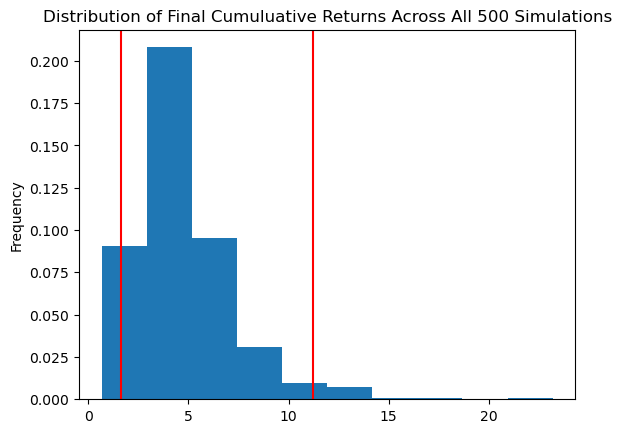

In [50]:
# Plot probability distribution and confidence intervals
dist_plot_30yr = MC_30years.plot_distribution()

dist_plot_30yr.get_figure().savefig('MC_30year_dist_plot.png',bbox_inches='tight')

### Retirement Analysis

In [51]:
# Fetch summary statistics from the Monte Carlo simulation results
MCS_results_30yr = MC_30years.summarize_cumulative_return()

# Print summary statistics
print(MCS_results_30yr) 

count           500.000000
mean              4.779807
std               2.496046
min               0.674335
25%               3.188289
50%               4.299578
75%               5.616510
max              23.179831
95% CI Lower      1.648467
95% CI Upper     11.215598
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [54]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(MCS_results_30yr[8]*20000,2)
ci_upper = round(MCS_results_30yr[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $32969.34 and $224311.97


/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_71462/368254637.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower = round(MCS_results_30yr[8]*20000,2)
/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_71462/368254637.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper = round(MCS_results_30yr[9]*20000,2)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [56]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(MCS_results_30yr[8]*30000,2)
ci_upper = round(MCS_results_30yr[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $49454.0 and $336467.95


/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_71462/3709348466.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower = round(MCS_results_30yr[8]*30000,2)
/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_71462/3709348466.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper = round(MCS_results_30yr[9]*30000,2)


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [57]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.20,.80],
    num_simulation=500,
    num_trading_days=252*5,
)

In [58]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_5years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.998755  1.005652  0.989847  1.004768  1.017652  1.022155  1.014911   
2     0.999362  1.004936  0.987933  0.992665  1.028808  1.027306  1.005216   
3     1.011256  1.015278  0.997278  1.002621  1.027167  1.021405  1.002839   
4     1.006234  1.014908  1.002165  1.003089  1.030298  1.015987  1.008740   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.133392  2.216523  1.749527  2.142022  1.662359  0.622817  2.726701   
1257  1.123127  2.208101  1.768976  2.145515  1.652823  0.631762  2.711600   
1258  1.121550  2.219943  1.778174  2.140184  1.682775  0.626521  2.700725   
1259  1.141495  2.254975  1.757334  2.112142  1.701120  0.617350  2.694417   
1260  1.143710  2.253701  1.739429  2.137732  1.721808  0.626068  2.689455   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.996193  0.991936  0.980807  ...  1.002032  0.992119  0.992025   
2     0.989345  0.988507  0.983230  ...  1.007476  0.988967  0.991649   
3     0.993807  0.989982  0.995508  ...  1.025404  1.000141  0.991990   
4     0.985795  0.987348  1.014689  ...  1.024307  1.015058  0.991932   
...        ...       ...       ...  ...       ...       ...       ...   
1256  1.993839  1.109766  1.338948  ...  2.383629  1.368773  1.170217   
1257  1.994828  1.105253  1.321380  ...  2.336954  1.367841  1.200376   
1258  1.976479  1.108935  1.316809  ...  2.351826  1.379495  1.199238   
1259  1.992140  1.120634  1.315792  ...  2.360645  1.402478  1.188266   
1260  2.044121  1.130547  1.299213  ...  2.357005  1.412367  1.190357   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.003446  0.997371  1.005733  1.002369  0.984758  1.000554  0.991826  
2     1.004279  0.997539  1.020787  1.016621  0.991903  0.994603  1.002760  
3     0.991539  1.008058  1.031369  1.020727  0.984956  1.005207  1.012717  
4     0.999911  1.003507  1.021662  1.020952  0.999655  0.982948  1.006499  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.378630  1.349471  2.895294  2.519887  1.893887  1.434134  1.480395  
1257  1.388146  1.326116  2.929171  2.522067  1.888503  1.413020  1.491854  
1258  1.398668  1.332564  2.928780  2.535707  1.885163  1.430028  1.515190  
1259  1.384320  1.333427  2.870599  2.516362  1.908351  1.447984  1.522635  
1260  1.400501  1.313869  2.867584  2.515435  1.928157  1.459311  1.502615  

[1261 rows x 500 columns]

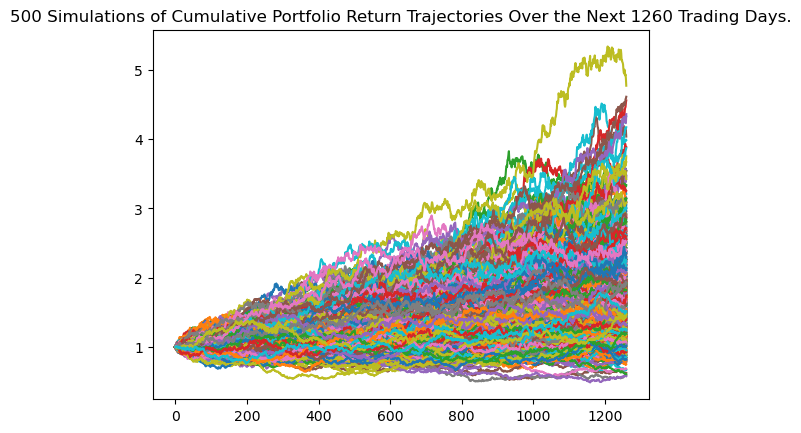

In [59]:
# Plot simulation outcomes
line_plot_5yr = MC_5years.plot_simulation()

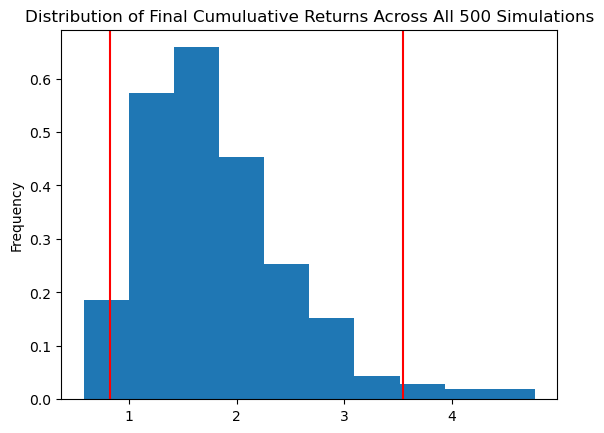

In [60]:
# Plot probability distribution and confidence intervals
dist_plot_5yr = MC_5years.plot_distribution()

In [61]:
# Fetch summary statistics from the Monte Carlo simulation results
MCS_5y_results = MC_5years.summarize_cumulative_return()

# Print summary statistics
print(MCS_5y_results)

count           500.000000
mean              1.799159
std               0.700639
min               0.578767
25%               1.304184
50%               1.656645
75%               2.136013
max               4.770480
95% CI Lower      0.818965
95% CI Upper      3.541277
Name: 1260, dtype: float64


In [62]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(MCS_5y_results[8]*60000,2)
ci_upper_five = round(MCS_5y_results[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $49137.88 and $212476.62


/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_71462/590358477.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower_five = round(MCS_5y_results[8]*60000,2)
/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_71462/590358477.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper_five = round(MCS_5y_results[9]*60000,2)


### Ten Years Retirement Option

In [63]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years = MCSimulation(
    portfolio_data = df_stock_data,
    weights=[.20,.80],
    num_simulation=500,
    num_trading_days=252*10,
)

In [64]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_10years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

0          1         2         3         4         5         6    \
0     1.000000   1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     1.010314   0.990462  1.022801  1.011810  1.006918  0.989522  1.016581   
2     1.018642   0.987536  1.042692  0.994352  1.023115  0.990046  1.020774   
3     1.024387   1.014500  1.035730  0.996920  1.039404  1.006161  1.020380   
4     1.033644   1.019920  1.029236  0.994977  1.032609  0.998032  1.024177   
...        ...        ...       ...       ...       ...       ...       ...   
2516  1.467027  10.779444  1.661995  4.362818  3.569070  4.965658  2.855381   
2517  1.498702  10.621327  1.637902  4.397726  3.633433  4.973848  2.835329   
2518  1.500951  10.617279  1.633294  4.462249  3.661999  4.987872  2.852453   
2519  1.506071  10.500956  1.612080  4.417955  3.641172  4.951896  2.863532   
2520  1.522510  10.385295  1.597749  4.394025  3.680677  4.964556  2.920826   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.991285  1.003589  0.995052  ...  1.014715  0.985565  1.009091   
2     0.988976  0.984089  1.009143  ...  1.014125  0.978265  0.993294   
3     1.001182  0.961096  1.025114  ...  0.990274  0.972938  0.994701   
4     0.992896  0.965433  1.017399  ...  0.980747  0.977917  1.009141   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.866942  4.179326  2.881180  ...  1.556987  0.727137  2.291075   
2517  1.834734  4.225494  2.863477  ...  1.563256  0.727640  2.326729   
2518  1.833269  4.219908  2.856098  ...  1.574119  0.744886  2.343699   
2519  1.799431  4.201926  2.877766  ...  1.582678  0.750890  2.365787   
2520  1.789819  4.239957  2.878111  ...  1.585685  0.739827  2.359756   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.009163  1.008140  0.997604  1.001563  0.996941  0.999178  1.010824  
2     1.013483  1.003090  0.983986  0.993817  0.980625  1.009167  1.030015  
3     1.013300  1.009189  0.996515  1.001080  0.982588  1.024956  1.026929  
4     1.007086  0.994027  0.997646  1.003712  0.980601  1.034469  1.018750  
...        ...       ...       ...       ...       ...       ...       ...  
2516  2.435011  5.217424  2.563572  0.966249  2.195498  4.149209  5.153185  
2517  2.483257  5.317360  2.569937  0.951831  2.226928  4.178344  5.084998  
2518  2.514119  5.241867  2.542444  0.957145  2.246008  4.247906  5.137676  
2519  2.476618  5.229019  2.559017  0.969909  2.283180  4.225131  5.171670  
2520  2.494487  5.224396  2.545379  0.974548  2.308194  4.249887  5.126013  

[2521 rows x 500 columns]

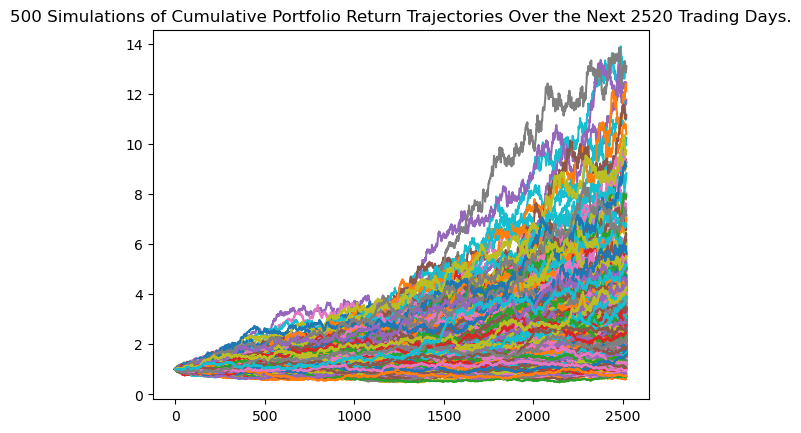

In [65]:
# Plot simulation outcomes
line_plot_10yr = MC_10years.plot_simulation()

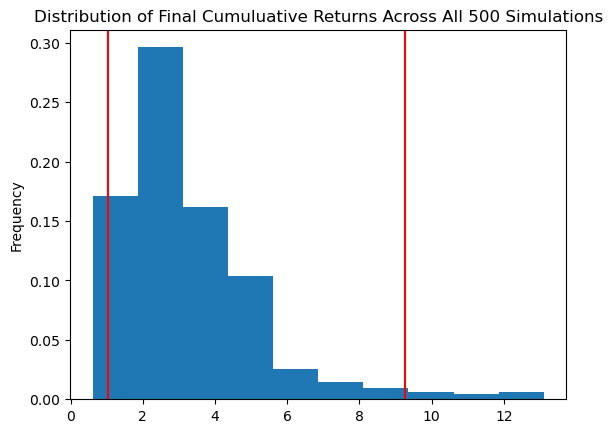

In [66]:
# Plot probability distribution and confidence intervals
dist_plot_10yr = MC_10years.plot_distribution()

In [67]:
# Fetch summary statistics from the Monte Carlo simulation results
MCS_10y_results = MC_10years.summarize_cumulative_return()

# Print summary statistics
print(MCS_10y_results)

count           500.000000
mean              3.286543
std               1.963810
min               0.611988
25%               1.998326
50%               2.816030
75%               4.146111
max              13.104378
95% CI Lower      1.024462
95% CI Upper      9.251756
Name: 2520, dtype: float64


In [68]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(MCS_10y_results[8]*60000,2)
ci_upper_ten = round(MCS_10y_results[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $61467.75 and $555105.37


/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_71462/553208340.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_lower_ten = round(MCS_10y_results[8]*60000,2)
/var/folders/3q/tg0639ln6j1347g5_ff9jvbw0000gn/T/ipykernel_71462/553208340.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ci_upper_ten = round(MCS_10y_results[9]*60000,2)


### QUESTIONS

1. Using the current value of only the stock and bond portion of the member's portfolio and the summary statistics that you generated from the new Monte Carlo simulation, what are the lower and upper bounds for the expected value of the portfolio (with the new weights) with a 95% confidence interval?

2. Will weighting the portfolio more heavily toward stocks allow the credit union members to retire after only 10 years?

In [ ]:
# answer the above before submitting